### 整体思路
1. 使用sin函数关系加上正态分布的噪声重复生成数据
2. 对生成的每一组数据做回归 尝试用多项式回归
3. 对生成的结果计算bias和variance
4. 可视化

In [65]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [66]:
sigma = 0.1
def sin_data_gen(start = 0, end = 2 * np.pi, step = 0.1, sigma = sigma):
    x = np.arange(start, end, step)
    y = np.sin(x) + np.random.normal(0, sigma, len(x))
    return x, y

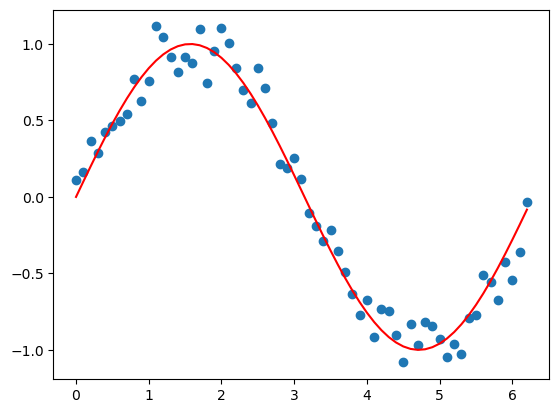

In [67]:
# 绘制正弦函数图像和数据点
import matplotlib.pyplot as plt
x, y = sin_data_gen()
plt.plot(x, y, 'o')
plt.plot(x, np.sin(x), 'r')
plt.show()

In [68]:
def polynomial_regression(X, y, degree=1, point = np.pi):
    """
    使用多项式回归拟合数据
    
    参数:
    X : array-like, shape (n_samples, 1)
        输入特征
    y : array-like, shape (n_samples,)
        目标值
    degree : int, default=1
        多项式的次数，用于控制模型复杂度
        
    返回:
    y_pred : array-like, shape (1,)
        预测值
    """
    # 创建多项式回归管道
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    
    # 转换输入数据形状
    X = X.reshape(-1, 1)
    
    # 拟合模型
    model.fit(X, y)

    y_pred = model.predict([[point]])
    
    return y_pred

In [69]:
def simulation(n = 100, degree = 3, point = np.pi, **kwargs_data_gen):
    """
    模拟重复回归的过程
    
    n : int, default=100
        模拟次数
    
    返回 : y_pre_list
        n次预测的值的列表

    **kwargs_data_gen : dict
        传递给 sin_data_gen 的参数:
        - start : float, default=0
        - end : float, default=2*np.pi
        - step : float, default=0.1
        - sigma : float, default=0.1

    流程 : 生成数据-回归-预测某点处的值-返回n次预测的值的列表
    """
    y_pre_list = []
    for _ in range(n + 1):
        X, y = sin_data_gen(**kwargs_data_gen)
        y_pre = polynomial_regression(X, y, degree, point)
        y_pre_list.append(y_pre)

    return y_pre_list

In [70]:
def plot_simulation():
    bias2 = []
    Var_f = []
    err = []
    for degree in range(1, 11):
        y_pre_list = simulation(degree=degree)
        E_f = np.mean(y_pre_list)
        Var_f.append(np.var(y_pre_list))
        bias2.append((np.sin(np.pi) - E_f) ** 2)
        err.append(np.var(y_pre_list) + (np.sin(np.pi) - E_f) ** 2 + sigma ** 2)
    
    # 绘制误差图像
    plt.plot(range(1, 11), bias2, label='bias^2')
    plt.plot(range(1, 11), Var_f, label='Var')
    # plt.plot(range(1, 11), err, label='error')
    plt.legend()
    plt.show()

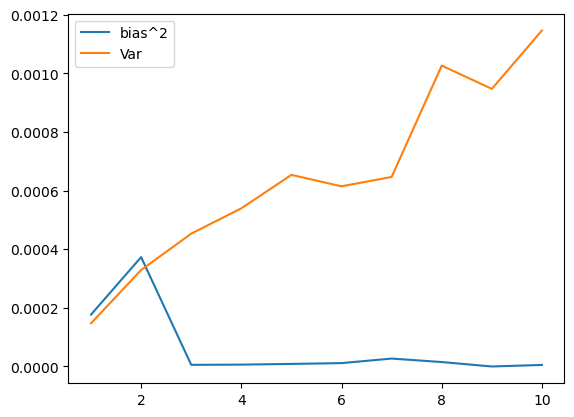

In [71]:
plot_simulation()